Заметки:
Сравнить средние сразу у красного и белого

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
red_wine=pd.read_csv('wine-quality Red.csv')
white_wine=pd.read_csv('wine-quality White.csv')

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Немного теории

"Fixed acidity" (фиксированная кислотность) — это показатель неиспаряющихся кислот в вине (например, винная и яблочная кислоты), которые отвечают за его кислотность и вкус.

"Volatile acidity" (летучая кислотность) — это показатель кислот, которые могут испаряться, главным образом уксусной кислоты. Высокий уровень летучей кислотности может придавать вину неприятные уксусные ароматы и считается дефектом, если превышает норму.

Citric acid (лимонная кислота) — это натуральная кислота, которая иногда добавляется в вино для повышения кислотности и придания свежести. В натуральном виде встречается редко, в основном в небольших количествах. Влияет на вкус, делая вино более ярким и освежающим.

Residual sugar (остаточный сахар) — это сахар, который остаётся в вине после завершения ферментации. Он определяет сладость вина: чем выше остаточный сахар, тем вино будет слаще. В сухих винах его содержание минимально, а в сладких — значительно больше.

Chlorides (хлориды) в вине — это соли, главным образом хлористый натрий, которые влияют на восприятие вкуса. Высокое содержание хлоридов может придавать вину солёные или минеральные ноты, что иногда считается нежелательным, если их слишком много.

Free sulfur dioxide (свободный диоксид серы) — это форма серы, используемая в вине как консервант. Он предотвращает окисление и развитие бактерий. Свободный диоксид серы остаётся активным в вине и защищает его от порчи, влияя на срок хранения и стабильность вкуса.

Total sulfur dioxide (общий диоксид серы) — это суммарное количество как свободного, так и связанного диоксида серы в вине. Он используется для защиты вина от окисления и микроорганизмов. Общий диоксид серы включает как активную часть, которая сохраняет вино, так и ту, что уже связалась с другими компонентами вина и неактивна.

Density (плотность) в вине — это показатель, отражающий его массу на единицу объёма. Он используется для оценки содержания сахара и алкоголя: более высокая плотность указывает на большее количество остаточного сахара, а более низкая — на более высокое содержание алкоголя, так как спирт легче воды.

pH в вине — это показатель кислотности, определяющий, насколько вино является кислым или щелочным. Шкала pH варьируется от 0 до 14, где значения 3-4 — типичны для большинства вин. Низкий pH (более кислое вино) способствует его сохранности и придаёт яркость вкусу.

Sulphates (сульфаты) в вине — это соли серной кислоты, которые могут влиять на вкус и структуру вина. Они обычно добавляются для улучшения стабильности и баланса вкуса, придавая вину минеральные ноты. Высокое содержание сульфатов может улучшать восприятие свежести и яркости, но также может вызывать ощущение горечи при избытке.

In [ ]:
print("Red Wine Data Shape:", red_wine.shape)
print("White Wine Data Shape:", white_wine.shape)

Red Wine Data Shape: (1599, 12)
White Wine Data Shape: (4898, 12)


In [ ]:
print("\nRed Wine Statistics:")
display(red_wine.describe())

print("\nWhite Wine Statistics:")
display(white_wine.describe())


Red Wine Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



White Wine Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Сначала проведем анализ белого вина**

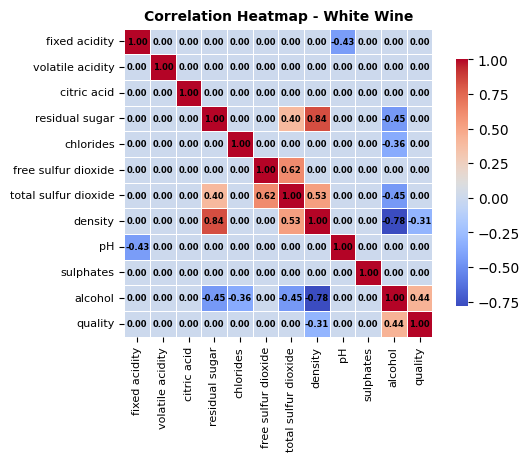

In [ ]:
corr = white_wine.corr()

# Заменяем значения от -0.3 до 0.3 на нули
corr_masked = np.where((corr >= -0.3) & (corr <= 0.3), 0, corr)

# Создаем тепловую карту
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_masked,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 6, "weight": "bold", "color": "black"},
    xticklabels=white_wine.columns,
    yticklabels=white_wine.columns
)
plt.title('Correlation Heatmap - White Wine', fontsize=10, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Слабая корелляция до 0.3 заменена на нули.    
Видна сильная корелляция residual sugar и density, но это понятный физический факт, что чем больше сахара, тем больше плотность.
Интересно, что оценка вина сильно кореллирует с процентом содержания алкоголя. А также видна обратная корелляция плотности и оценки. Значит ли это, что менее плотное вино более качественное?
Также видна корелляция плотности и содержание спирта, но это так же связано с тем, что плотность определяется содержанием спирта и сахара.

### Проверим нормальное распределения

### Зависимость качества от содержания алкоголя


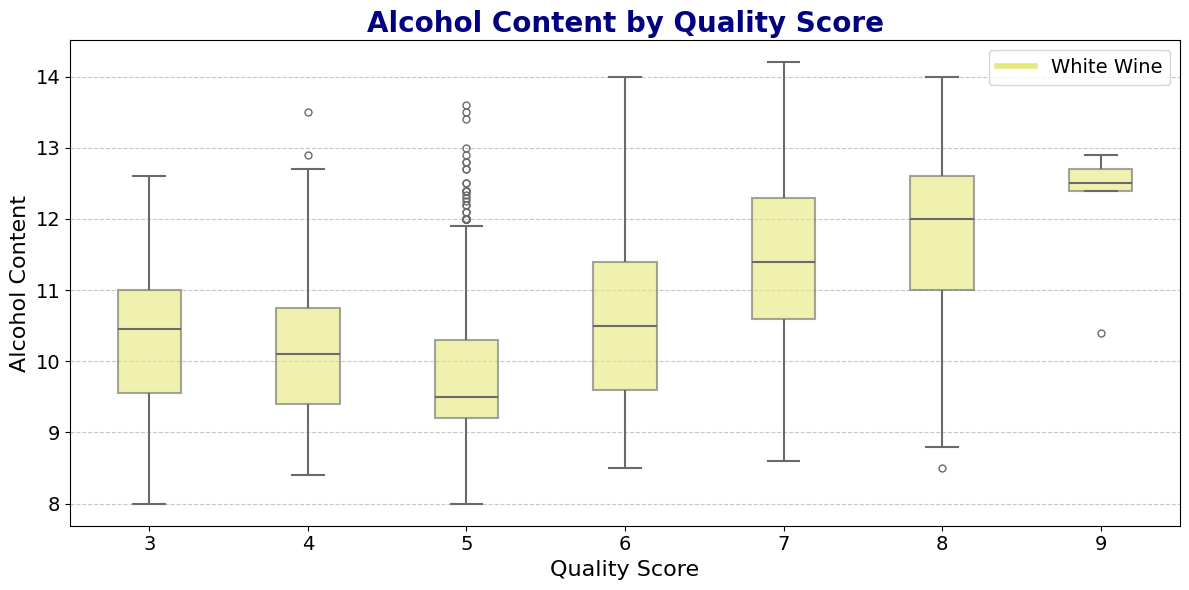

In [ ]:
plt.figure(figsize=(12, 6))

# Create a custom color palette
palette = ['#e6e87b']

# Boxplot for red wine
sns.boxplot(x='quality', y='alcohol', data=white_wine, color=palette[0], width=0.4,
            fliersize=5, linewidth=1.5, boxprops=dict(facecolor=palette[0], alpha=0.6))


# Adding title and labels
plt.title('Alcohol Content by Quality Score', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Quality Score', fontsize=16)
plt.ylabel('Alcohol Content', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid and customize it
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customizing the legend
handles = [plt.Line2D([0], [0], color=palette[0], lw=4)]
plt.legend(handles, ['White Wine'], loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

Интересно распределение количества вин по качеству.

In [ ]:
white_quality_count = white_wine['quality'].value_counts()
print(white_quality_count)

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


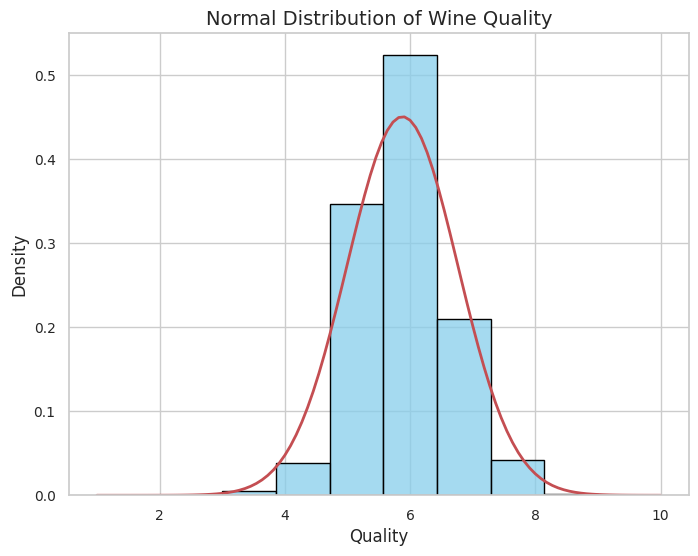

In [ ]:
plt.figure(figsize=(8, 6))

# Построение гистограммы
sns.histplot(white_wine['quality'], bins=7, stat='density', color='skyblue', edgecolor='black')

# Добавление линии нормального распределения
mean = np.mean(white_wine['quality'])
std_dev = np.std(white_wine['quality'])
x = np.linspace(1, 10, 100)
p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, p, 'r', linewidth=2)

# Настройки графика
plt.title('Normal Distribution of Wine Quality', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

В целом, график распределения оценок белого вина похож на нормальное распределение.

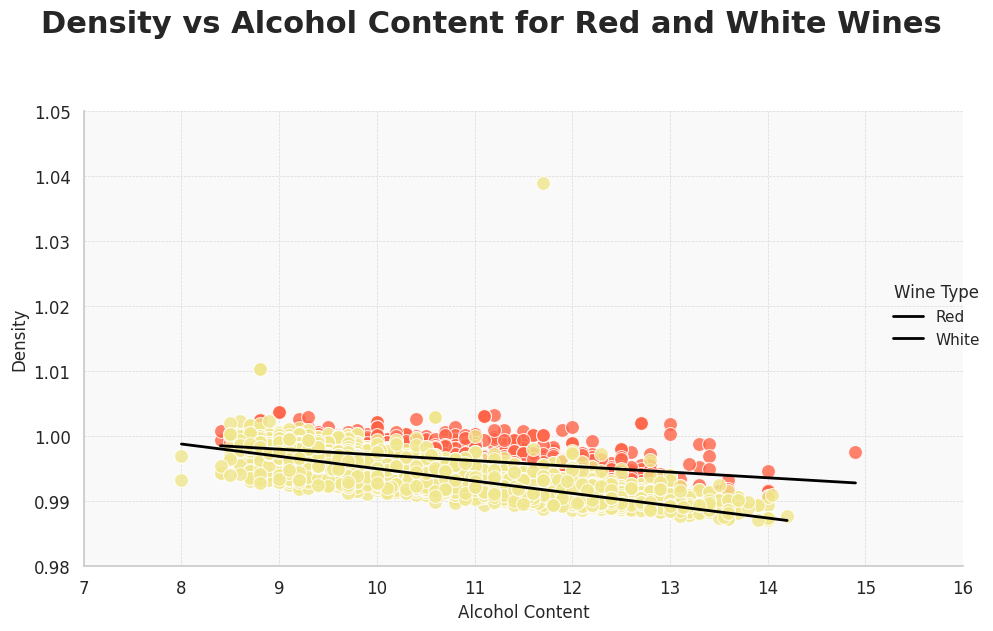

In [ ]:
combined_data = pd.concat([red_wine.assign(type='Red'), white_wine.assign(type='White')])
sns.set(style="whitegrid")

# Create a FacetGrid
g = sns.FacetGrid(combined_data, hue='type', height=6, aspect=1.5, palette=['#FF6347', '#F0E68C'])

# Map scatter plot and regression line to the grid
g.map(sns.scatterplot, 'alcohol', 'density', alpha=0.8, edgecolor='w', s=100)
g.map(sns.regplot, 'alcohol', 'density', scatter=False, ci=None, color='black', line_kws={'linewidth': 2})

# Add titles and labels
g.set_titles("Density vs Alcohol Content")
g.set_axis_labels("Alcohol Content", "Density")
g.add_legend(title='Wine Type')

# Customize the appearance
plt.suptitle('Density vs Alcohol Content for Red and White Wines', fontsize=22, fontweight='bold', y=1.05)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize tick labels
g.set_xticklabels(fontsize=12)
g.set_yticklabels(fontsize=12)

# Add a light background and grid
for ax in g.axes.flatten():
    ax.set_facecolor('#f9f9f9')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

Посчитаем средние значения всех характеристик для плохого вина и для хорошего вина. Возможно, это даст понимание идеального соотношения характеристик.

In [ ]:
white_wine_bad = white_wine[(white_wine['quality'] == 3) | (white_wine['quality'] == 4)]
white_wine_good = white_wine[(white_wine['quality'] == 8) | (white_wine['quality'] == 9)]
mean_bad = white_wine_bad.mean()
median_bad = white_wine_bad.median()
mean_good = white_wine_good.mean()
median_good = white_wine_good.median()
mean_all = white_wine.mean()
median_all = white_wine.median()
mean_combined = pd.concat([mean_bad, median_bad, mean_good, median_good, mean_all, median_all], axis=1)
mean_combined.columns = ['Bad Q Mean', 'Bad Q Median', 'Good Q Mean', 'Good Q Median', 'All Mean', 'All Median']
print(mean_combined.round(3))

                      Bad Q Mean  Bad Q Median  Good Q Mean  Good Q Median  \
fixed acidity              7.181         6.900        6.678          6.800   
volatile acidity           0.376         0.320        0.278          0.260   
citric acid                0.308         0.300        0.328          0.320   
residual sugar             4.821         2.700        5.628          4.300   
chlorides                  0.051         0.046        0.038          0.036   
free sulfur dioxide       26.634        18.000       36.628         34.500   
total sulfur dioxide     130.232       119.000      125.883        122.000   
density                    0.994         0.994        0.992          0.992   
pH                         3.183         3.160        3.221          3.230   
sulphates                  0.476         0.470        0.486          0.460   
alcohol                   10.173        10.100       11.651         12.000   
quality                    3.891         4.000        8.028     

**"Volatile acidity"** (летучая кислотность) — это показатель кислот, которые могут испаряться, главным образом уксусной кислоты. Высокий уровень летучей кислотности может придавать вину неприятные уксусные ароматы и считается дефектом, если превышает норму.

Действительно, если посмотреть на наши данные, в среднем у хорошего вина летучая кислотность меньше.

Содержание спирта в хорошем вине в среднем больше, чем в плохом.

Для total sulfur dioxide значение среднего и медианы сильно отличаются, попробуем узнать в чём дело.

In [ ]:
print(white_wine['total sulfur dioxide'].max())
print(white_wine['total sulfur dioxide'].min())

440.0
9.0


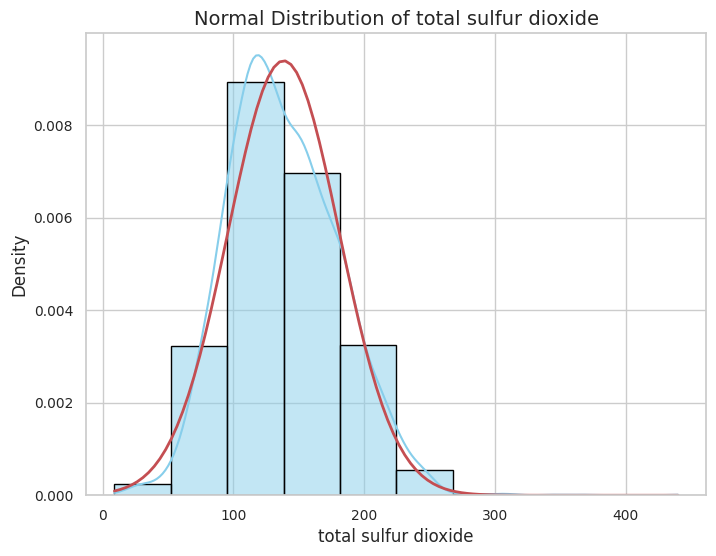

In [ ]:
plt.figure(figsize=(8, 6))

# Построение гистограммы
sns.histplot(white_wine['total sulfur dioxide'], bins=10, kde=True, stat='density', color='skyblue', edgecolor='black')

# Добавление линии нормального распределения
mean = np.mean(white_wine['total sulfur dioxide'])
std_dev = np.std(white_wine['total sulfur dioxide'])
x = np.linspace(white_wine['total sulfur dioxide'].min(), white_wine['total sulfur dioxide'].max(), 100)
p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, p, 'r', linewidth=2)

# Настройки графика
plt.title('Normal Distribution of total sulfur dioxide', fontsize=14)
plt.xlabel('total sulfur dioxide', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

Среднее и медиана отличаются, т.к распределение смещено вправо.